In [84]:
import pandas as pd
K = 273.15

In [125]:
file1 = r'C:\Users\janousu\OneDrive - Oulun yliopisto\CROCUS\MYDATA\OBS\KENTTAROVA\METEO_KENTTAROVA_final.csv'
file2 = r'C:\Users\janousu\OneDrive - Oulun yliopisto\CROCUS\MYDATA\OBS\KENTTAROVA\obs_KENTTAROVA_hourly.csv'

In [126]:
meteo = pd.read_csv(file1, sep=';', index_col=0, parse_dates=True, usecols=['time','Tair'])
obs = pd.read_csv(file2, sep=';', index_col=0, parse_dates=True)
obs = obs[['LE', 'LE_flag']]
obs.index.name = 'time'

In [127]:
all = pd.DataFrame(index=obs.index)

In [128]:
all['Tair'] = meteo['Tair'] - K # deg C
all['LE_flag'] = obs['LE_flag'] # numeric
all['LE'] = obs['LE'] # W m-2)

In [129]:
all['heat_of_vaporization'] = (2.501 - 0.00237*all['Tair'])*10e6 # J kg-1

In [130]:
all['ET'] = all['LE']*-1/all['heat_of_vaporization'] # kg m-2 s-1
all['ET_h'] = all['ET'] * 60 * 60

<Axes: xlabel='time'>

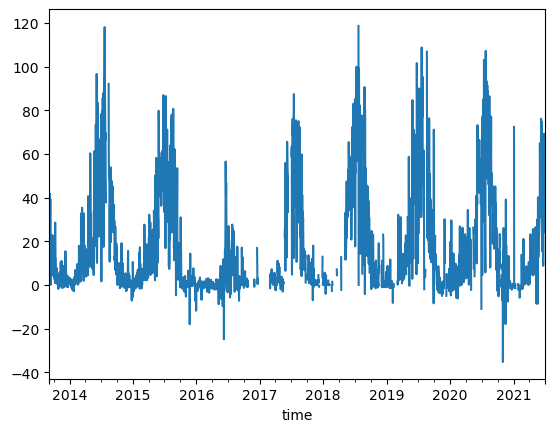

In [143]:
(all.loc[all['LE_flag'] < 2, 'LE'].resample('D').mean()*-1).plot()